## HR Average per season with minimum AB

Create a bar chart where you can see the average of all players HR’s per season with a minimum of 100AB.

Crear una gráfica de barras del promedio de Hr’s de todos los jugadores por temporada con un mínimo de 100AB.

The set of databases can be found in this link. Consider it is a csv file. Find the Batting.csv data base in the Core folder.

https://github.com/chadwickbureau/baseballdatabank/tree/master/core

The raw data for the Batting data base is in

https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Batting.csv

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Parameters used in the code. Change as needed before running the code
DATA_BASE_PATH = 'https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Batting.csv'
START_YEAR = 1871
END_YEAR = 2022
MIN_AB = 100
YLIM_START = 0
YLIM_END = 16
COLUMNS_TO_RETRIEVE = ['playerID', 'yearID', 'HR', 'AB']

In [7]:
# Read the data base
battingDf = pd.read_csv(DATA_BASE_PATH)
hRStatsDf = battingDf.loc[:, COLUMNS_TO_RETRIEVE]

In [8]:
# Allocate memory in a numpy array
battingArray = np.zeros([END_YEAR - START_YEAR, 2])

In [10]:
# Populate the array
condition1 = hRStatsDf.AB >= MIN_AB
for i in range(START_YEAR, END_YEAR):
    condition2 = hRStatsDf.yearID == i
    yearHRMean = hRStatsDf.loc[condition1 & condition2, :].HR.mean()
    battingArray[i -START_YEAR, 0] = i
    battingArray[i -START_YEAR, 1] = yearHRMean

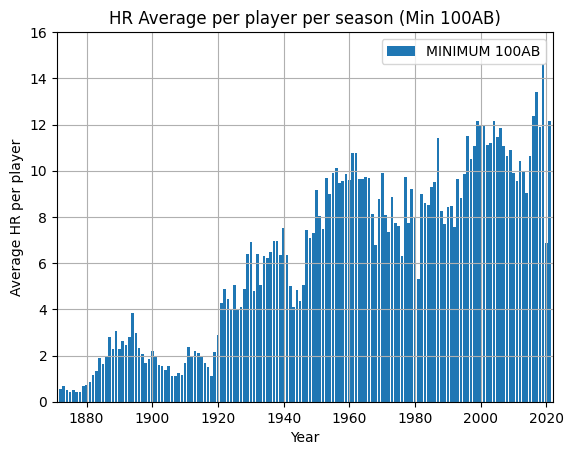

In [11]:
plt.bar(battingArray[:,0], battingArray[:,1])
plt.title('HR Average per player per season (Min '+ str(MIN_AB) + 'AB)')
plt.xlabel('Year')
plt.ylabel('Average HR per player')
plt.legend(['MINIMUM ' + str(MIN_AB) + 'AB'])
plt.xlim([START_YEAR, END_YEAR])
plt.ylim([YLIM_START, YLIM_END])
plt.grid()
plt.show()